In [1]:
import os
import numpy as np
from tqdm import tqdm
from glob import glob
from utils import data as ud
from utils import analysis as ua
from matplotlib import pyplot as plt

%matplotlib inline

In [ ]:
directories = ['I=0', 'I=40', 'I=55']
paths = {}

for folder in directories:
    query = 'data/' + folder + '/*'
    paths[folder] = glob(query)    

100%|██████████| 11/11 [00:34<00:00,  3.82s/it]


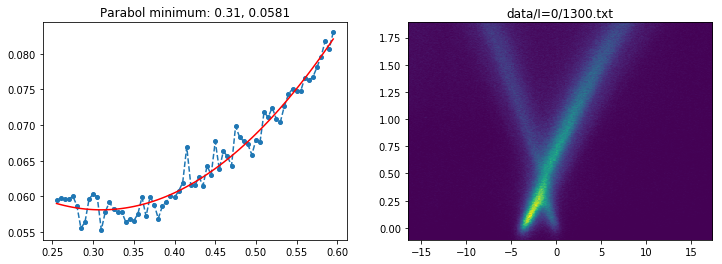

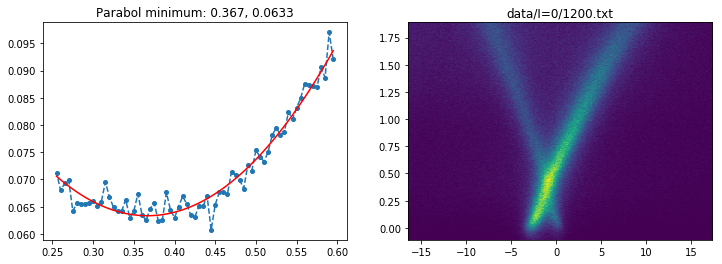

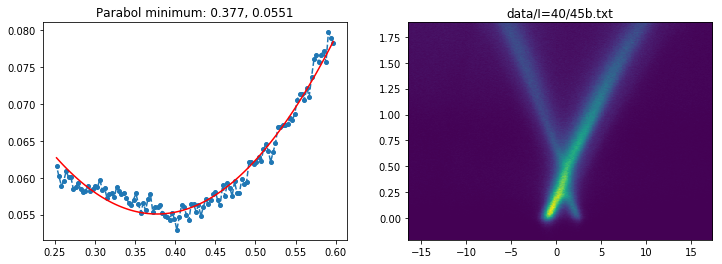

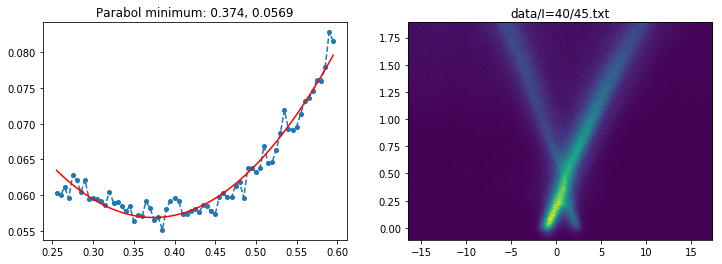

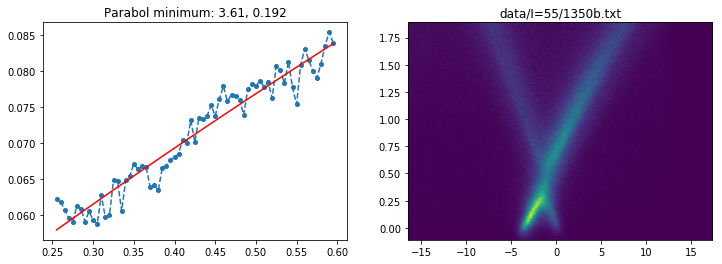

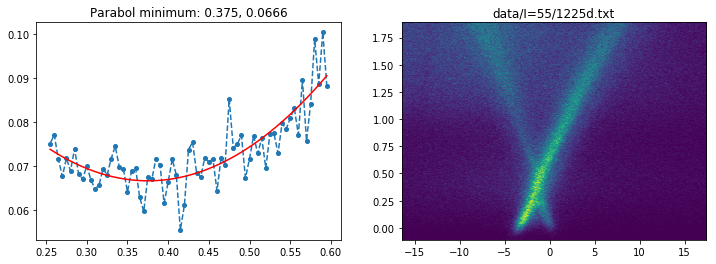

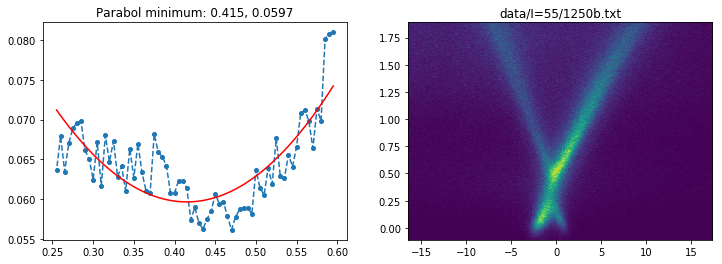

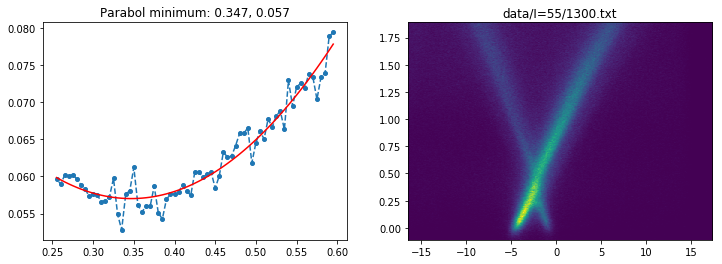

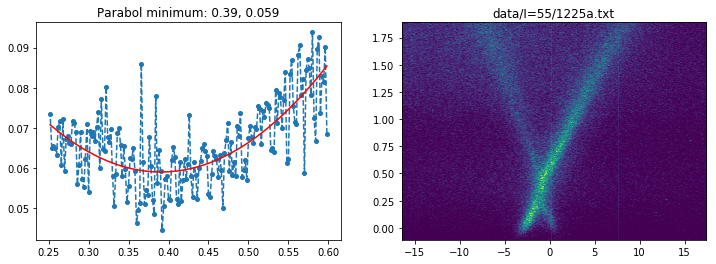

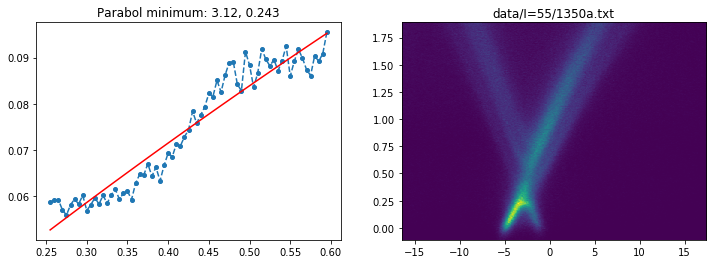

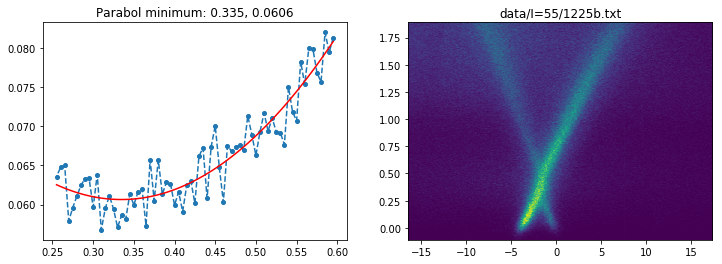

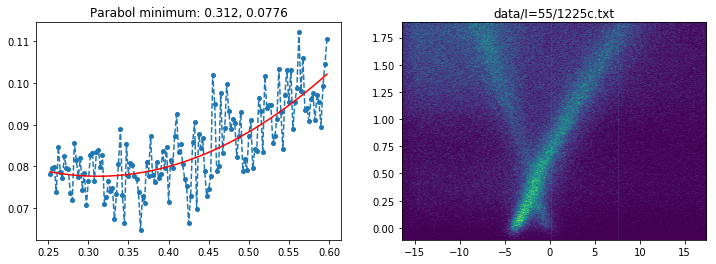

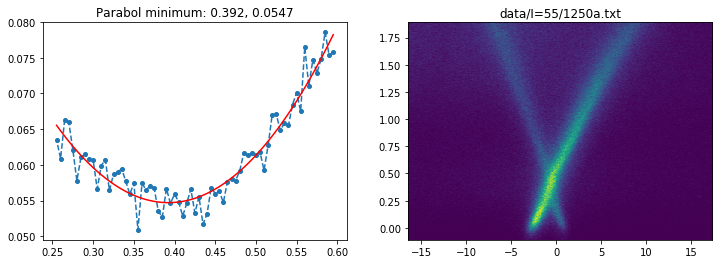

In [ ]:
weights = {}
for folder in directories:
    for path in tqdm(paths[folder]):
        # Prepare data
        arpes = ud.read_arpes(path)

        # Get results
        Eb_span = [0.25, 0.6]
        Eb, weight = ua.analyse_arpes(arpes, Eb_span)
        weights[path] = weight

        # Display
        plt.figure(figsize = [12, 4])
        plt.subplot(1, 2, 1)
        plt.plot(Eb, weight, '--o', ms = 4)
        
        # Save as '.dat' files to avoid confusion
        filename = os.path.basename(path)[:-4]
        savepath = 'results/' + folder + '_widths_' + filename + '.dat'
        
        # With 2 columns: Eb and peak half-width
        row_format = '{},{}\n'
        with open(savepath, 'w') as fout:
            for row in zip(Eb, weight):
                fout.write(row_format.format(*row))
        

        z = np.polyfit(Eb, weight, 2)
        p = np.poly1d(z)
        plt.plot(Eb, p(Eb), c='r')

        # -b/2a
        x_min = -z[1]/(2*z[0])
        #plt.axvline(x = x_min, c = 'k')
        plt.title('Parabol minimum: {:.3g}, {:.3g}'.format(x_min, p(x_min)))

        plt.subplot(1, 2, 2)
        img, extent = ud.to_show(arpes)
        plt.title(path)
        plt.imshow(img, extent = extent, aspect = 'auto')
